# Module 8 Exercises - Logistic Regression

### Exercise 1:

[Download the diabetes.csv file](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/datasets) and load it in as a dataframe. Narrow your dataset to include columns and/or rows that best predicts the outcome of if a patient will get diabetes.

In [20]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline


loc = "datasets/diabetes.csv"
df = pd.read_csv(loc)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


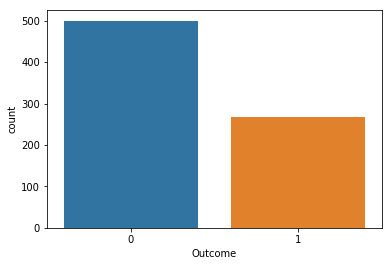

In [21]:
sns.countplot(x='Outcome', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


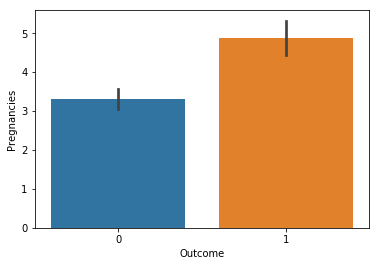

In [28]:
sns.barplot('Outcome', 'Pregnancies', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


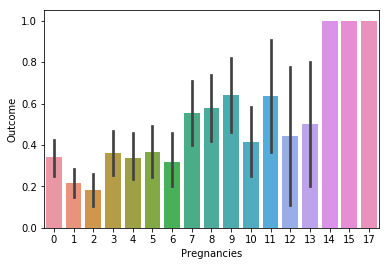

In [18]:
sns.barplot('Pregnancies', 'Outcome', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


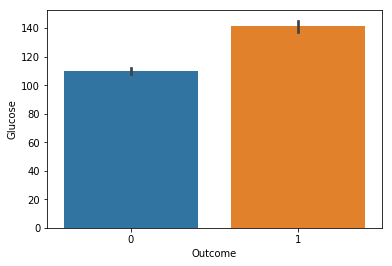

In [15]:
sns.barplot('Outcome', 'Glucose', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


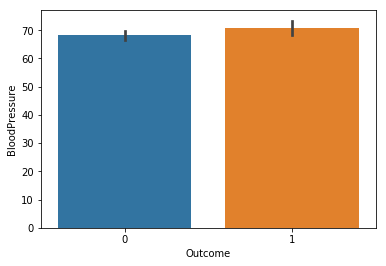

In [22]:
sns.barplot('Outcome', 'BloodPressure', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


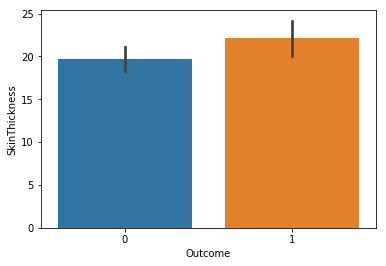

In [23]:
sns.barplot('Outcome', 'SkinThickness', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


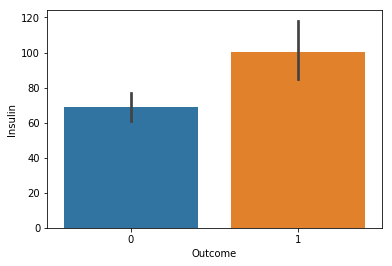

In [24]:
sns.barplot('Outcome', 'Insulin', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


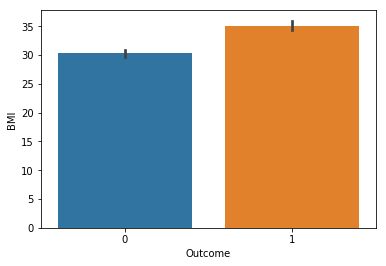

In [25]:
sns.barplot('Outcome', 'BMI', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


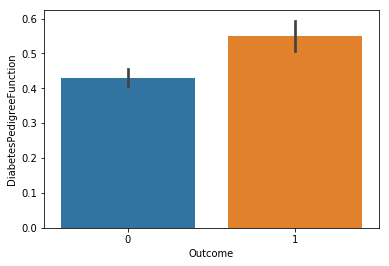

In [26]:
sns.barplot('Outcome', 'DiabetesPedigreeFunction', data=df)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


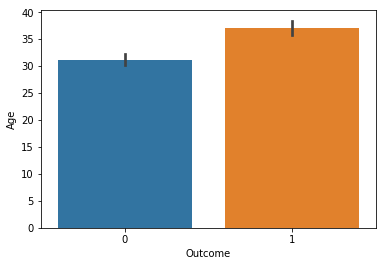

In [27]:
sns.barplot('Outcome', 'Age', data=df)

In [ ]:
pregnancy, glucose, insulin, age, pedigree, BMI

In [30]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
modeldf = df.drop(["BloodPressure", "SkinThickness"], axis=1)
modeldf.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


### Exercise 2:

Using the dataframe in the exercise above, split the dataset into training and testing. Use the default 25% test setting.

In [33]:
y = modeldf['Outcome']

X = modeldf.drop(['Outcome'], axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

### Exercise 3:

Using the logistic regression function in the scikit-learn library (sklearn), fit the model with the training dataset. Then score the model for training; how well did it do?

In [35]:
# step 3: create logistic regression model 

## assign logistic regression function to a variable
LogReg = LogisticRegression()

# fit our model to the TRAINING data
# this is where our model is going to learn our data

LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
LogReg.score(X_train, y_train)

0.7621527777777778

### Exercise 4:

Now use the test dataset on the logistic regression function and get its score.

In [37]:
y_pred = LogReg.predict(X_test)

In [38]:
LogReg.score(X_test, y_test)

0.78125

### Exercise 5:

Make a confusion matrix for the predicted outcomes to compare it against the "true" outcomes. How many values for each outcome did the model get incorrect?

In [39]:
cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted No Diabetes Dx', 'Predicted Diabetes Dx'],
    index=['True No Diabetes Dx', 'True Diabetes Dx'])

cm

,Predicted No Diabetes Dx,Predicted Diabetes Dx
True No Diabetes Dx,110,11
True Diabetes Dx,31,40


* TP: 40
* TN: 110

### Exercise 6:

Get a classification report on the model for the predicted data. Which outcome is the model more accurate at predicting?

In [40]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.91      0.84       121
          1       0.78      0.56      0.66        71

avg / total       0.78      0.78      0.77       192



Model is better at predicting those without Diabetes